# **Capstone Project Proposal for COVID19 prediction**

## **Introduction**
The COVID-19 pandemic has caused significant disruption globally, and the situation continues to evolve. The analysis and prediction of COVID-19 spread are essential for effective public health policies and prevention strategies. This project aims to analyze COVID-19 data from various sources and develop models to predict the future spread of the virus.

## **Attribute Description**
Dataset Description Dataset contails symptoms of patients which is crucial to identify the infection of covid. Columns are categorical in nature. Details of the columns are :

- ID : This column indicates the Id given to each patient which is unique.

- Sex : This column indicates the gender of the individual, it is a Categorical data i.e. male or female.

- Age ≥60 above years : This column indicates the age of the individual is above 60 or not, it is a Categorical data i.e. True or False.

- Test date :This column indicates the date on when individual tested for covid that he/she is corona positive or not.

- Cough :This column indicates that the individual has Cough or not, it is a Categorical data i.e. True or False.

- Fever :This column indicates that the individual has Fever or not, it is a Categorical data i.e. True or False.

- Sore throat :This column indicates that the individual has Sore throat or not, it is a Categorical data i.e. True or False.

- Shortness of breath :This column indicates that the individual has Shortness of breath or not, it is a Categorical data i.e. True or False.

- Headache :This column indicates that the individual has Headache or not, it is a Categorical data i.e. True or False.

- Known contact :This column indicates that the individual has Known contact or not, it is a Categorical data i.e. Abroad,Contact with confirmed or Other.

- Corona : This column indicates that the individual has Coroona or not, it is a Categorical data i.e. positive or negative.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CAP+Project+2+-+corona_tested_006 (1).zip to CAP+Project+2+-+corona_tested_006 (1).zip


In [ ]:
import pandas as pd
df=pd.read_csv("CAP+Project+2+-+corona_tested_006 (1).zip")

<ipython-input-2-d740227fe5aa>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("CAP+Project+2+-+corona_tested_006 (1).zip")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.shape

(278848, 11)

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
for i in df:
  print(i,":",df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['TRUE' 'FALSE' 'None' False True]
Fever : ['FALSE' 'TRUE' 'None' False True]
Sore_throat : ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath : ['FALSE' 'TRUE' 'None' False True]
Headache : ['FALSE' 'TRUE' 'None' False True]
Corona : 

In [ ]:
treating_columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']

In [ ]:
for i in treating_columns:
  df[i]=df[i].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Cough_symptoms'].unique()

array(['true', 'false', 'none', False, True], dtype=object)

In [ ]:
for i in treating_columns:
  df[i]=df[i].apply(lambda x: 'false' if x==False else x)
  df[i]=df[i].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Fever'].unique()

array(['false', 'true', 'none'], dtype=object)

In [ ]:
for i in treating_columns:
  df[i]=df[i].replace('none',df[i].mode()[0])

In [ ]:
df['Sore_throat'].unique()

array(['true', 'false'], dtype=object)

In [ ]:
for i in df:
  print(i,":",df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['true' 'false']
Fever : ['false' 'true']
Sore_throat : ['true' 'false']
Shortness_of_breath : ['false' 'true']
Headache : ['false' 'true']
Corona : ['negative' 'positive' 'other']
Age_60_above : ['None' 'No' 'Yes']
Sex : ['None' 'male' 'f

In [ ]:
df['Corona']=df['Corona'].replace('other',df['Corona'].mode()[0])

In [ ]:
df['Corona'].unique()

array(['negative', 'positive'], dtype=object)

## The data is cleaned now so performing SQL queries here only

In [ ]:
import duckdb

In [ ]:
conn=duckdb.connect()
conn.register('df',df)

In [ ]:
conn.execute('select * from df limit 5').fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,None,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,None,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,None,Contact with confirmed


In [ ]:
# Find the number of corona patients who faced shortness of breath.
conn.execute("select count(Ind_ID) as No_of_Corona_patients from df where Shortness_of_breath='true' ").fetchdf()

,No_of_Corona_patients
0,1577


In [ ]:
# Find the number of negative corona patients who have fever and sore_throat.
conn.execute("select count(Ind_ID) as No_of_NegCorona_patients from df where Corona='negative'and (Fever='true' and Sore_throat='true') ").fetchdf()

,No_of_NegCorona_patients
0,142


In [ ]:
# Group the data by month and rank the number of positive cases.
conn.execute("SELECT MONTH(Test_date) AS Month, COUNT(*) AS Number_of_positive_cases FROM df WHERE Corona  = 'positive' GROUP BY MONTH ORDER BY COUNT(*) DESC").fetchdf()

BinderException: ignored

In [ ]:
#Find the female negative corona patients who faced cough and headache.
conn.execute("select Count(Ind_ID) from df where Sex='female' and Corona='negative' and (Cough_symptoms='true' and Headache='true')").fetchdf()

,count(Ind_ID)
0,38


In [ ]:
#How many elderly corona patients have faced breathing problems?
conn.execute("select Count(Ind_ID) from df where Age_60_above='Yes' and Shortness_of_breath='true'").fetchdf()

,count(Ind_ID)
0,292


In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,None,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,None,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,None,Contact with confirmed


In [ ]:
# Which three symptoms were more common among COVID positive patients?
conn.execute("With CS as (select Count(Ind_ID) as Cough from df where Cough_symptoms='true' and Corona='positive' ),F as (select Count(Ind_ID) as Fever from df where Fever='true' and Corona='positive' ),ST as (select Count(Ind_ID) as Sore_throat from df where Sore_throat='true' and Corona='positive' ),SOB as (select Count(Ind_ID) as Shortness_of_breath from df where Shortness_of_breath='true' and Corona='positive' ),H as (select Count(Ind_ID) as Headache from df where Headache='true' and Corona='positive' ) select Cough,	Fever,	Sore_throat,	Shortness_of_breath,	Headache from CS,F,ST,SOB,H   ").fetchdf()


,Cough,Fever,Sore_throat,Shortness_of_breath,Headache
0,6584,5559,1526,1164,2235


Here I have used CTE,
so from that we can see three most common symptoms in Corona positive patients are COugh ,Fever and Headache.

In [ ]:
# Which symptom was less common among COVID negative people?
conn.execute("With CS as (select Count(Ind_ID) as Cough from df where Cough_symptoms='true' and Corona='negative' ),F as (select Count(Ind_ID) as Fever from df where Fever='true' and Corona='negative' ),ST as (select Count(Ind_ID) as Sore_throat from df where Sore_throat='true' and Corona='negative' ),SOB as (select Count(Ind_ID) as Shortness_of_breath from df where Shortness_of_breath='true' and Corona='negative' ),H as (select Count(Ind_ID) as Headache from df where Headache='true' and Corona='negative' ) select Cough,	Fever,	Sore_throat,	Shortness_of_breath,	Headache from CS,F,ST,SOB,H   ").fetchdf()


,Cough,Fever,Sore_throat,Shortness_of_breath,Headache
0,35644,16193,400,413,179


Here I have used CTE,
so from that we can see less common symptoms in Corona negative patients are Headache,Sore_thorat and Shortness of breath.

In [ ]:
# What are the most common symptoms among COVID positive males whose known contact was abroad?
conn.execute("With CS as (select Count(Ind_ID) as Cough from df where Cough_symptoms='true' and Corona='positive' and Sex='male' and Known_contact='Abroad' ),F as (select Count(Ind_ID) as Fever from df where Fever='true' and Corona='positive' and Sex='male' and Known_contact='Abroad' ),ST as (select Count(Ind_ID) as Sore_throat from df where Sore_throat='true' and Corona='positive' and Sex='male' and Known_contact='Abroad'),SOB as (select Count(Ind_ID) as Shortness_of_breath from df where Shortness_of_breath='true' and Corona='positive' and Sex='male' and Known_contact='Abroad'),H as (select Count(Ind_ID) as Headache from df where Headache='true' and Corona='positive' and Sex='male' and Known_contact='Abroad') select Cough,	Fever,	Sore_throat,	Shortness_of_breath,	Headache from CS,F,ST,SOB,H   ").fetchdf()


,Cough,Fever,Sore_throat,Shortness_of_breath,Headache
0,532,407,87,84,129


Here I have used CTE,
so from that we can see the most common symptoms among COVID positive males whose known contact was abroads are Cough,Fever and Headache.

## Hypothesis:
* 1) Cough_symptoms	,Fever,Sore_throat are highly correlated with Corona i.e.
     Target variable.
* 2) XGBoost classifier is going to predict corona virus better than Random
     forest tree classifier.
* 3) Logistic Regression is going to predict corona virus better than Decision
     Tree Classifier.

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,None,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,None,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,None,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,None,Contact with confirmed


In [ ]:
df['Cough_symptoms'] = pd.get_dummies(df['Cough_symptoms'],drop_first=True)  # to aviod multicolinearity

df['Fever'] = pd.get_dummies(df['Fever'],drop_first=True)

df['Sore_throat'] = pd.get_dummies(df['Sore_throat'],drop_first=True)

df['Shortness_of_breath'] = pd.get_dummies(df['Shortness_of_breath'],drop_first=True)

df['Headache'] = pd.get_dummies(df['Headache'],drop_first=True)

df['Corona'] = pd.get_dummies(df['Corona'],drop_first=True)

In [ ]:
df['Sex'].replace({'male':0,'female':1,'None':2},inplace=True)
df['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [ ]:
df['Age_60_above']=df['Age_60_above'].replace(['No','Yes','None'],[0,1,2])

In [ ]:
for i in df:
  print(i,":",df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : [1 0]
Fever : [0 1]
Sore_throat : [1 0]
Shortness_of_breath : [0 1]
Headache : [0 1]
Corona : [0 1]
Age_60_above : [2 0 1]
Sex : [2 0 1]
Known_contact : [0 1 2]


## Bivariate Analysis

<Axes: >

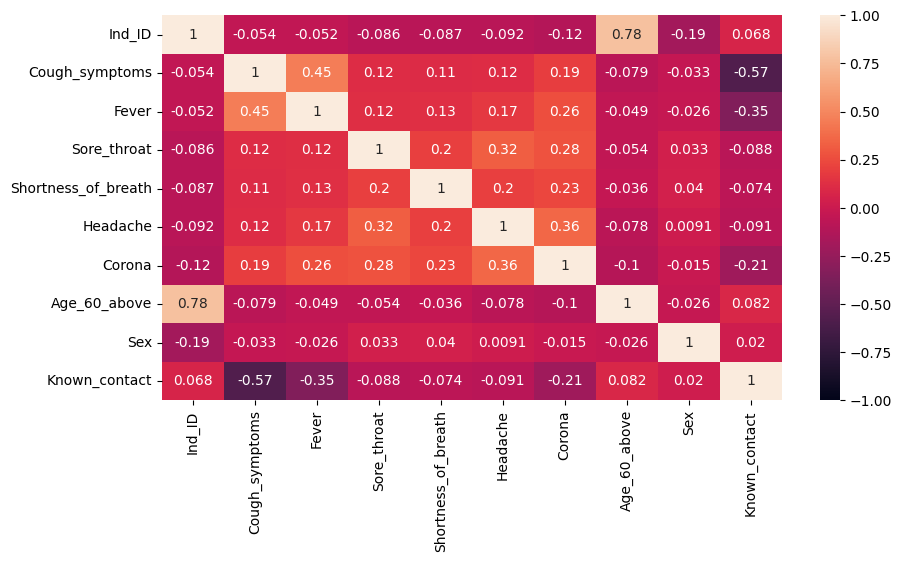

In [ ]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

<Axes: xlabel='Cough_symptoms'>

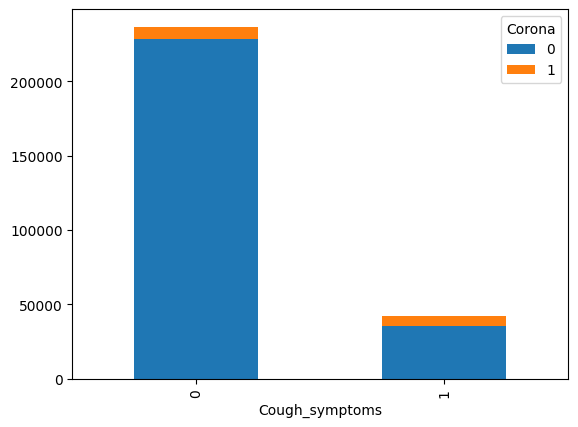

In [ ]:
pd.crosstab(df['Cough_symptoms'],df['Corona']).plot(kind='bar',stacked=True)

In [ ]:
from scipy.stats import chi2_contingency
p=df['Cough_symptoms']
q=df['Corona']

contingency_table=pd.crosstab(p,q)

chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print('Chi-squared statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)

Chi-squared statistic: 10569.415074648161
P-value: 0.0
Degrees of freedom: 1


* Form the graph we can say that, the patients having Cough_symptoms or not but
  almost same amount of Corona affected patients are found.
* here the p-value is less than 0.05 i.e. p-value=0.0
* so it is highly correlated.
* We can say that Cough_symptoms is a important factor to predit the Corona virus.

<Axes: xlabel='Fever'>

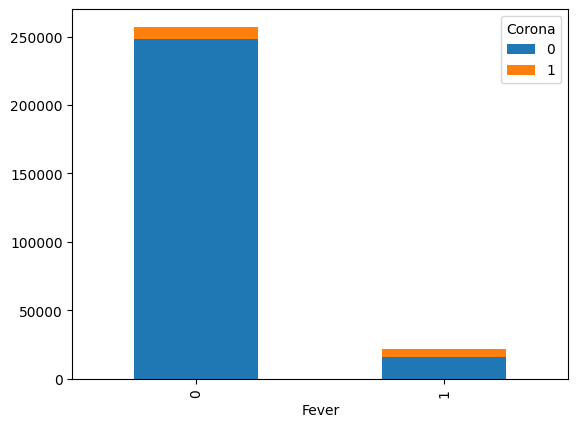

In [ ]:
pd.crosstab(df['Fever'],df['Corona']).plot(kind='bar',stacked=True)

In [ ]:
from scipy.stats import chi2_contingency
p=df['Fever']
q=df['Corona']

contingency_table=pd.crosstab(p,q)

chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print('Chi-squared statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)

Chi-squared statistic: 19378.570935486066
P-value: 0.0
Degrees of freedom: 1


* Form the graph we can say that, the patients having Fever or not but
  almost same amount of Corona affected patients are found.
* here the p-value is less than 0.05 i.e. p-value=0.0
* so it is highly correlated.
* We can say that Fever can be a factor to predit the Corona virus.

<Axes: xlabel='Sore_throat'>

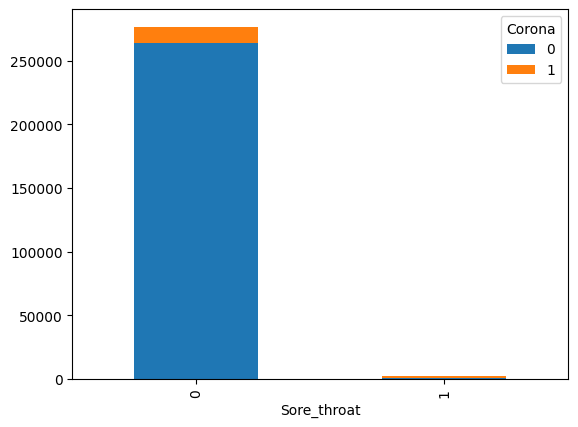

In [ ]:
pd.crosstab(df['Sore_throat'],df['Corona']).plot(kind='bar',stacked=True)

In [ ]:
from scipy.stats import chi2_contingency
p=df['Sore_throat']
q=df['Corona']

contingency_table=pd.crosstab(p,q)

chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print('Chi-squared statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)

Chi-squared statistic: 21183.30774235602
P-value: 0.0
Degrees of freedom: 1


* Form the graph we can say that, the patients having Sore_throat are more afftected by Corona as comapred to patients not having sore_throat.
* here the p-value is less than 0.05 i.e. p-value=0.0
* so it is highly correlated.
* We can say that Sore_throat is important to predit the Corona virus.

## Feature Selection

In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,2,2,0
1,2,11-03-2020,0,1,0,0,0,1,2,2,0
2,3,11-03-2020,0,1,0,0,0,1,2,2,0
3,4,11-03-2020,1,0,0,0,0,0,2,2,0
4,5,11-03-2020,1,0,0,0,0,0,2,2,1


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

- Here we are not taking Ind_Id and test_date because we don't think it will going to of any use.

In [ ]:
X=df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]
y=df['Corona']

In [ ]:
rfe=RFE(estimator=LogisticRegression(),n_features_to_select=4)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(), n_features_to_select=4)

In [ ]:
for i,col in zip(range(X.shape[1]),X.columns):
  print(f"{col} selected-{rfe.support_[i]} rank={rfe.ranking_[i]}")

Cough_symptoms selected-False rank=4
Fever selected-True rank=1
Sore_throat selected-True rank=1
Shortness_of_breath selected-True rank=1
Headache selected-True rank=1
Age_60_above selected-False rank=3
Sex selected-False rank=5
Known_contact selected-False rank=2


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# chi square method to select important k best features

selector = SelectKBest(score_func=chi2, k=6)

X_new = selector.fit_transform(X, y)

idxs_selected = selector.get_support(indices=True)

feat_names = X.columns[idxs_selected]

feat_names

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above'],
      dtype='object')

Here in Feature Selection,after looking at RFE and chi2 filter test:
- We are taking Fever,Sore_throat,Shortness of breadth and Headache for sure.
- We are also Taking Cough_symptons because while finding p-value it is found to be highly correlated with target variable though it is not showing in RFE but it is showing in chi2 filter test.
- So we are taking Cough_symptoms as crucial feature.
- Here we are not taking Age_60_above because most of the patient are almost below 60 yr of age.
- We are not taking known_contact feature bcoz it is not in RFE as well as chi2 filter test.

# **Model Building and Training**

In [ ]:
X=df[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']]
y=df['Corona']

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(223078, 5)

In [ ]:
y_train.shape

(223078,)

In [ ]:
X_test.shape

(55770, 5)

In [ ]:
y_test.shape

(55770,)

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
X_scale_train=m.fit_transform(X_train)

In [ ]:
X_scale_test=m.transform(X_test)

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
logreg.fit(X_scale_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_scale_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_lr = accuracy_score(y_test, y_pred)
print('The accuracy is :',round(accuracy_lr,4))
print(confusion_matrix(y_test,y_pred))

The accuracy is : 0.9573
[[52686   146]
 [ 2238   700]]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X,y, cv=10)
print('The average cross-validation score is:', round(scores.mean(),4))

The average cross-validation score is: 0.9565


After Cross Validation the accuracy remains the same which is 96%

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))

Accuracy: 0.9573


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_list={'max_depth': [2,3,5],
           'min_samples_leaf': [5,10,20],
           'n_estimators': [10,25,30]
           }

In [ ]:
clf=GridSearchCV(rf,param_grid=param_list,cv=5,scoring='accuracy')

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 10}

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_RF=accuracy_score(y_pred,y_test)
print(round(accuracy_RF,4))
print(classification_report( y_pred,y_test))

0.9573
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     54924
           1       0.24      0.83      0.37       846

    accuracy                           0.96     55770
   macro avg       0.62      0.89      0.67     55770
weighted avg       0.99      0.96      0.97     55770



## Decison Tree Clasifier

In [ ]:
#Performing Pre-Prunning
parameter={
          'criterion':['gini', 'entropy', 'log_loss'],
          'splitter':['best', 'random'],
          'max_depth':[1,2,3,4,5],
          'max_features':['auto', 'sqrt', 'log2'],
          }

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
cv=GridSearchCV(dtc,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
y_pred=cv.predict(X_test)

In [ ]:
Accuracy_DT=accuracy_score(y_test,y_pred)
print("Accuracy:",round(Accuracy_DT,4))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9573
[[52686   146]
 [ 2238   700]]


### By selecting the best parameters the accuracy is 95.73%

## XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test,y_pred),4))
print(confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)
f1 = f1_score(y_test, y_pred)
print(f1)

Accuracy: 0.9573
[[52661   171]
 [ 2210   728]]
0.8097886540600667
0.24778761061946902
0.37946312223090956


### Performing Post-Pruning

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
xg=XGBClassifier(max_depth=2)
xg=xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
accuracy_xg=round(accuracy_score(y_test,y_pred),4)
print("Accuracy_xg:", accuracy_xg)
print(confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)
f1 = f1_score(y_test, y_pred)
print(f1)

Accuracy: 0.9573
[[52686   146]
 [ 2238   700]]
0.8274231678486997
0.2382573179033356
0.3699788583509513


Hence we got accuracy on different classification

- logisitic regression got accuracy 95.73%

- DecisionTree got accuracy 95.73%

- xg boosting got accuracy 95.73%

- Random Forest got accuracy 95.73%

We can say that all models has performed well because they all have same accuracies which is 95%

### Checking the Hypothesis:
* 1) Cough_symptoms	,Fever,Sore_throat are highly correlated with Corona i.e.
     Target variable.
* Ans:After looking at the graphs we can say that Cough_symptoms	,Fever,
     Sore_throat are highly correlated with Corona i.e.Target variable.
* 2) XGBoost classifier is going to predict corona virus better than Random
     forest tree classifier.
* Ans:As we see above that Accuracy of XGBoost classifier and  Random
     forest tree classifier are same so they perform well.
* 3) Logistic Regression is going to predict corona virus better than Decision
     Tree Classifier.
* Ans: As we see above that Accuracy of Logistic Regression and Decision tree
     classifier are same so they perform well.

## Questions to answwer:

* 1) Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  
    * Ans:THe proposal to predit COVID-19 prediction is highly relevent in today's due to increase in cases of Corona. With the rise in corona positive cases there is a high risk that it will affect people, making it essential to efficiently predict the Corona virus in an individual.It will help the doctor to give proper treatment to the patient and minimize the risk for others to get affected. By using the algorithms, it is very helpful to analuze others factors which leading a person to get affected by corona i.e. Sore throat, headache,cough,etc. By predicting accurately it can offer lower risks and for the betterment and welfare of the mankind.













* 2) How is it going to impact the medical field when it comes to effective screening and reducing health care burden.
    * Ans:It will going to impact the medical field in many ways:
     - 1)Screening of covid patients:By using this models,it is going to be easy to seprate patients which are positive and which are negative,on the basis of this, we can lower the risk and provide better treatment to both the patients.
     - 2)Reducing the risk: By identifying patients with lower risk and patients who are having very mild symptoms can be treated afterwards and the patients with very strong symptoms should be treated first bcoz of this the healthcare burden is reduce and they can prirotize their attention given to each patient.

* 3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.
    * Ans: There should be column such as images of lungs because of cough,patient history,etc because that will help the doctor to diagnose the patient is a better way.THis will be really helpful to increase the efficiency of the helathcare unit.